In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import sqlite3

sys.path.insert(0, '/home/nsryan/Desktop/arfc/transition-scenarios/scripts')
mycolors = ["#332288", "#117733", "#44AA99", "#88CCEE", "#DDCC77", "#CC6677", "#AA4499", "#882255"]
plt.rcParams.update({'font.size': 14})

In [18]:
import cymetric as cym
import transition_metrics as tm
import dataframe_analysis as dta
#import transition_plots as tp # requires pyne

In [19]:
#current_outfile = '../../../exp_tran/two_reac_mmr-lwr.sqlite'
current_outfile = '../../../exp_tran/front_end-v1.sqlite'

## Reactor Deployment

In [20]:
current_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill', 'Conversion',
                 'Enrichment', 'FuelFab', 'DryStorage', 'United States',
                 'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA']
#mmr_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill', 'Conversion',
#             'Enrichment', 'FuelFab', 'DryStorage', 'United States',
#             'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
#             'MMR_enter','MMR_exit']
#xe_nonlwr = ['Sink_HLW', 'Sink_LLW', 'Mine', 'Mill', 'Conversion',
#             'Enrichment', 'FuelFab', 'DryStorage', 'United States',
#             'WetStorage', 'FuelCycle', 'UNITED_STATES_OF_AMERICA',
#             'Xe-100_enter', 'Xe-100_exit']

In [21]:
current_reactors = tm.get_lwr_totals(current_outfile, current_nonlwr)
current_reactors = dta.add_year(current_reactors)

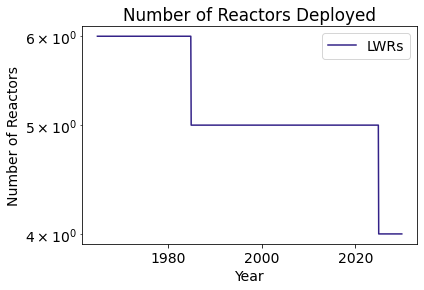

In [22]:
# Plot the numeber of reactors deployed

#plt.figure(figsize=(7,4))
plt.plot(current_reactors['Year'], current_reactors['lwr_total'], label='LWRs', color=mycolors[0])
#plt.plot(mmr_nogrowth_reactors['Year'], mmr_nogrowth_reactors['mmr_total'], 'tab:purple',
#         label=r'USNC MMR$^{TM}$, Scenario 2')
#plt.plot(xe_nogrowth_reactors['Year'], xe_nogrowth_reactors['xe_total'], 
#         'tab:orange', label='X-energy Xe-100, Scenrio 3')
#plt.plot(mmr_1percent_reactors['Year'], mmr_1percent_reactors['mmr_total'], 
#         'r', label='USNC MMR$^{TM}$, Scenario 4')
#plt.plot(xe_1percent_reactors['Year'], xe_1percent_reactors['xe_total'], 
#         'g', label='X-energy Xe-100, Scenrio 5')
plt.title('Number of Reactors Deployed')
plt.xlabel('Year')
plt.ylabel('Number of Reactors')
plt.yscale('log')
plt.legend()

## Energy Output

In [23]:
current_energy = tm.get_annual_electricity(current_outfile)

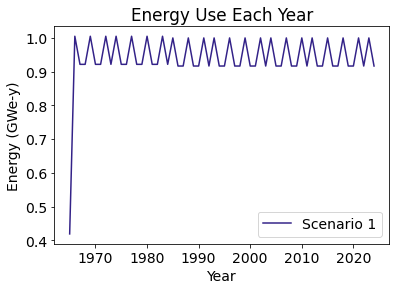

In [24]:
# Plot the yearly energy 

time = np.linspace(2025,2089, 65)

#plt.figure(figsize=(7,4))
plt.plot(current_energy['Year'], current_energy['Energy'], label='Scenario 1', color=mycolors[0])
#plt.plot(mmr_nogrowth_energy['Year'], mmr_nogrowth_energy['Energy'], 
#         'tab:purple', label='Scenario 2')
#plt.plot(xe_nogrowth_energy['Year'], xe_nogrowth_energy['Energy'], 
#         'tab:orange', label='Scenario 3')
#plt.plot(mmr_1percent_energy['Year'], mmr_1percent_energy['Energy'], 
#         'r', label='Scenario 4')
#plt.plot(xe_1percent_energy['Year'], xe_1percent_energy['Energy'],
#         'g', label='Scenario 5')

plt.title('Energy Use Each Year')
plt.xlabel('Year')
plt.ylabel('Energy (GWe-y)')
plt.legend()

### Energy Produced by Reactor Type

Text(0.5, 0, 'Year')

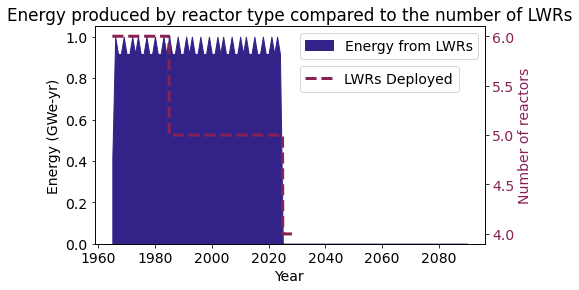

In [25]:
lwr_energy = tm.get_lwr_energy(current_outfile, ['MMR'])

fig = plt.figure(figsize=(7,4))
ax1 = fig.add_subplot(111)
ax1.stackplot(lwr_energy['Year'], lwr_energy['Energy'], labels=['Energy from LWRs'], color=mycolors[0])
ax1.legend()
ax1.set_ylabel('Energy (GWe-yr)')

ax2 = ax1.twinx()
ax2.plot(current_reactors['Year'], current_reactors['lwr_total'], color=mycolors[7], 
         linestyle='--', linewidth=3, label='LWRs Deployed')
ax2.legend(loc=(0.525, 0.7))
ax2.set_ylabel('Number of reactors', color=mycolors[7])
ax2.tick_params(axis='y', labelcolor=mycolors[7])

plt.title('Energy produced by reactor type compared to the number of LWRs')
ax1.set_xlabel('Year')

## Energy Input

## Material Transactions
You can use:
```
sqlite3 -header -csv $database.sqlite "select * from $table;" > $table.csv
```
to create a csv from a sqlite database, but add_reciever_prototype is how you get transactions_df, that can be very unclear from the docstrings.

In [26]:
current_transactions = tm.add_receiver_prototype(current_outfile)


In [27]:
current_uox = dta.commodity_mass_traded(current_transactions, 'fresh_uox')


Text(0.5, 1.0, 'Mass of uranium supplied to all reactors')

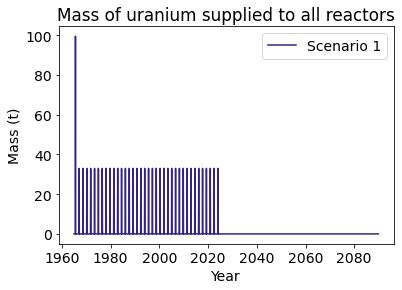

In [28]:
# Comparing fresh_uox transactions to all reactors
plt.figure()

plt.plot(current_uox['Year'], current_uox['Quantity']/1000, 
         label='Scenario 1', color=mycolors[0])
#plt.plot(mmr_1percent_uox['Year'], mmr_1percent_uox['Quantity']/1000, 
#         'r', label='Scenario 4')
#plt.plot(mmr_nogrowth_uox['Year'], mmr_nogrowth_uox['Quantity']/1000, 
#          'tab:purple', label='Scenario 2')
#plt.plot(xe_1percent_uox['Year'], xe_1percent_uox['Quantity']/1000, 
#          'g', label='Scenario 5')
#plt.plot(xe_nogrowth_uox['Year'], xe_nogrowth_uox['Quantity']/1000, 
#          'tab:orange', label='Scenario 3')
plt.legend() #(loc=2)
plt.ylabel('Mass (t)')
plt.xlabel('Year')
plt.title('Mass of uranium supplied to all reactors')

Text(0.5, 1.0, 'Mass of uranium supplied to all reactors')

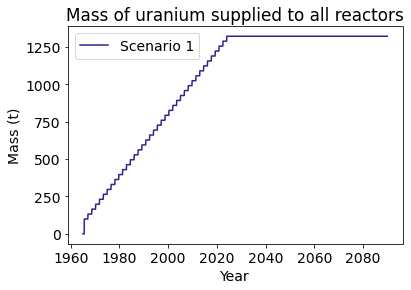

In [29]:
plt.figure()
plt.plot(current_uox['Year'], current_uox['Quantity'].cumsum()/1000, 
         label='Scenario 1', color=mycolors[0])
#plt.plot(mmr_1percent_uox['Year'], mmr_1percent_uox['Quantity'].cumsum()/1000, 
#         'r', label='Scenario 4')
#plt.plot(mmr_nogrowth_uox['Year'], mmr_nogrowth_uox['Quantity'].cumsum()/1000, 
#          'tab:purple', label='Scenario 2')
#plt.plot(xe_1percent_uox['Year'], xe_1percent_uox['Quantity'].cumsum()/1000, 
#          'g', label='Scenario 5')
#plt.plot(xe_nogrowth_uox['Year'], xe_nogrowth_uox['Quantity'].cumsum()/1000, 
#          'tab:orange', label='Scenario 3')
plt.legend(loc=2)
plt.ylabel('Mass (t)')
plt.xlabel('Year')
plt.title('Mass of uranium supplied to all reactors')

## SWU Calcs
SWU = $(P*V(x_p) + T*V(x_t) - F*V(x_f))*t$

V($x_i$) = $(2*x_i-1)*\ln(x_i/(1-x_i))$

In [30]:
#Defining assays for LEU product, tails, and feed material
leu_p = 0.045
x_f = 0.00711
x_t = 0.002

In [31]:
current_tails = dta.calculate_tails(current_uox['Quantity'], leu_p, x_t, x_f)
current_feed = dta.calculate_feed(current_uox['Quantity'], current_tails)
current_swu = dta.calculate_SWU(current_uox['Quantity'], leu_p,
                               current_tails, x_t,
                               current_feed, x_f)
current_swu = current_swu.to_frame().reset_index()
current_swu = current_swu.rename(columns={'Quantity':'SWU', 'index':'Time'})
current_swu = dta.add_year(current_swu)

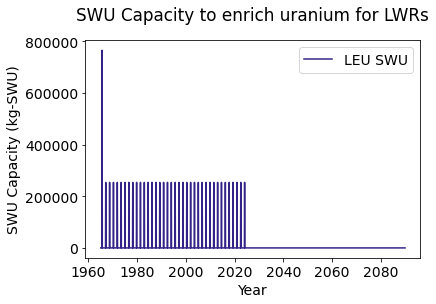

In [33]:
plt.plot(current_swu['Year'], current_swu['SWU'], label='LEU SWU', color=mycolors[0])

plt.xlabel('Year')
plt.ylabel('SWU Capacity (kg-SWU)')
title = plt.title('SWU Capacity to enrich uranium for LWRs', pad=20)
plt.legend()